In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } },
    tex2jax: {
        inlineMath: [ ['$','$'], ["\\(","\\)"] ],
        displayMath: [ ['$$','$$'], ["\\[","\\]"] ],
        processEscapes: true,
        processEnvironments: true
    },
    //displayAlign: 'left', // Change this to 'center' to center equations.     
    "HTML-CSS": {
        styles: {'.MathJax_Display': {"margin": 20}}
    }    
});
// Process equation numbers
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## A Short Introduction to the Implications of Discretization, by Example

### Numerical Theory

To get a feel for the numerics used in I-Flow, we are going to play around with the convection equation:

\begin{equation}
\frac{\partial u}{\partial t} + a \cdot \frac{\partial u}{\partial x} = 0
\label{eq:conv}
\end{equation}

with: $$u := u(x,t)$$

to see how it behaves when solved numerically.

To solve this equation on a computer, we need to find a way to transform the problem from a continuous space, where the data span is infinite, to a discrete space, where the problem is represented by a finite number of points. This transformation should be chosen in such a way that as little information as possible is lost in the process so that the problem solved on the computer stays physically and mathematically similar to the real life problem.



A possible way to approach this transformation would be to consider a Taylor-series expansion of the function $u(t)$ around $\Delta t$:

\begin{equation}
u(t + \Delta t) = u(t) + \Delta t \frac{\partial \, u(t)}{\partial t} 
+ \frac{(\Delta t)^2}{2!}\frac{\partial^2 u(t)}{\partial t^2} \, + \, ...
\label{eq:taylor}
\end{equation}

Re-organizing this equation slightly to move the $u'(t)$ term to the left-hand side, and dividing by $\Delta t$ yields:

\begin{equation} \frac{\partial \, u(t)}{\partial t} = \frac{u(t + \Delta t) - u(t)}{\Delta t} 
-  \frac{\Delta t}{2!}\frac{\partial^2 u(t)}{\partial t^2} \, + \, ...
\label{eq:taylor_discrete}
\end{equation}

If we then consider that, for a given discrete representation, $u$ exists at a series of points separated by an interval $\Delta t$, then, by definition, at any discrete point of index $n$, we would have:

\begin{align*}
u_n &= u(t) \\
u_{n+1} &= u(t + \Delta t)
\end{align*}

Equation (\ref{eq:taylor_discrete}) can therefore be re-written as:

\begin{equation}
\frac{\partial \, u(t)}{\partial t} = \frac{u_{n+1} - u_{n}}{\Delta t} \color{red}{
-  \frac{\Delta t}{2!}\frac{\partial^2 u(t)}{\partial t^2} \, + \, ...}
\end{equation}

This result is very interesting because it tells us that the continuous derivative of $u(t)$ with respect to $t$ at a certain point can be approximated by a finite difference approximation using two discrete points $u_n$ and $u_{n+1}$ seperated by an interval $\Delta t$, minus some extra terms in red.



These extra terms in red can be described as the "error" made in our finite-difference approximation of the derivative $u'(t)$, and we could replace them with the notation:

$$O(\Delta t) =  - \frac{\Delta t}{2!}\frac{\partial^2 u(t)}{\partial t^2} \, + \, ...$$

which describes an error term $O()$, of leading order $\Delta t$.  This term is important because it tells us that, in order to have an accurate discrete approximation of $u'(t)$, we need to make sure that $\Delta t$ is chosen small enough so that the terms contained in $O(\Delta t)$ are neglegible.

To wrap everything up, our finite-difference approximation of $u'(t)$ can now be written as:

\begin{equation}
\frac{\partial \, u(t)}{\partial t} = \frac{u_{n+1} - u_{n}}{\Delta t} + O(\Delta t)
\label{eq:fd_t}
\end{equation}

We could apply the same approach to determine an approximation of $u'(x)$ using two discrete points at an index $i$ and $i-1$ sperated by an interval $\Delta x$ and we would obtain:

\begin{equation}
\frac{\partial \, u(x)}{\partial x} = \frac{u_{i} - u_{i-1}}{\Delta x} + O(\Delta x)
\label{eq:fd_x}
\end{equation}


Combining equations (\ref{eq:fd_t}) and (\ref{eq:fd_x}) in equation (\ref{eq:conv}) and re-organizing the error terms gives us:

\begin{equation}
\frac{u_{n+1} - u_{n}}{\Delta t} + a \cdot \frac{u_{i} - u_{i-1}}{\Delta x} + O(\Delta t, \Delta x) = 0
\end{equation}

From now on, we will take the error term $O(\Delta t, \Delta x)$ for granted and remove it from our approximation, keeping in mind that our approximation will only be valid if that error term is neglegibly small.  Our discrete representation of the convection equation can therefore be written as:

\begin{equation}
\frac{u_{n+1} - u_{n}}{\Delta t} + a \cdot \frac{u_{i} - u_{i-1}}{\Delta x} = 0
\label{eq:tmp_fd_conv}
\end{equation}

We can see that the first fraction has $u$ terms defined in time (index $n$), but not in space (index $i$), whereas the second fraction has $u$ terms defined in space, but not in time. We will now choose, rather arbitrarily, to take the time-related points at the spatial index $i$, and to take the space-related points at time-level $n$. Moreover, to be able to seperate both indices, the space indices will remains as subscripts, while the time indices will be shifted to superscripts. 

Equation (\ref{eq:tmp_fd_conv}) will be re-writen as:

\begin{equation}
\frac{u_{i}^{n+1} - u_{i}^{n}}{\Delta t} + a \cdot \frac{u_{i}^{n} - u_{i-1}^{n}}{\Delta x} = 0
\label{eq:fd_conv}
\end{equation}

Regrouping all the items of time-level $n$ at the right side of the equal sign yields the equation:

\begin{equation}
u_{i}^{n+1} = u_{i}^{n} - a \frac{\Delta t}{\Delta x} \cdot (u_{i}^{n} - u_{i-1}^{n})
\label{eq:num_eq}
\end{equation}



Equation (\ref{eq:num_eq}) is convenient because it allows, given an initial solution at $t=0$ defined at a discrete number of points $i$, to compute a new solution at a time $\Delta t$ in the future satisfying the convection equation. By subsequently repeating this operation, the solution can be advanced in time until a time of interest $t=N$ is reached.

Moreover, in equation (\ref{eq:num_eq}), the term
\begin{equation}
a \frac{\Delta t}{\Delta x}
\label{eq:cfl}
\end{equation}
is called the CFL number, and plays a crucial role in the behaviour of the discrete solution, as we will explain now.

Re-substituting the Taylor-series expansions (\ref{eq:taylor}) back into equation (\ref{eq:num_eq}), we can analyse the equivalent differential equation solved by our numerical approximation. We would have:
\begin{equation}
\begin{split}
\frac{\partial \bar{u}}{\partial t} + a \cdot \frac{\partial \bar{u}}{\partial x}  &= \frac{a \Delta x}{2}\left( 1 - \frac{a \Delta t}{\Delta x}\right)\frac{\partial ^2 \bar{u}}{\partial x^2} \\
&= \nu_{num} \cdot \frac{\partial ^2 \bar{u}}{\partial x^2}
\end{split}
\label{eq:equivalent}
\end{equation}
where
\begin{equation}
\begin{split}
\nu_{num} &\equiv \frac{a \Delta x}{2}\left( 1 - \frac{a \Delta t}{\Delta x}\right) \\
&\equiv \frac{a \Delta x}{2}\left( 1 - {CFL}\right)
\end{split}
\label{eq:num_visc}
\end{equation}

We see that the discretization has introduced a diffusion term in our original equation, with a numerical viscosity term $\nu_{num}$ a function of the CFL number.  This effectively means that the numerical solution will obey a convection-diffusion equation, as opposed to the original convection equation we defined.

For stability, the viscosity term should be positive, to avoid having an indefinitely growing numerical solution in time. Hence:
\begin{equation}
\begin{split}
&0 \leq \frac{a \Delta t}{\Delta x} \leq 1 \\
\Leftrightarrow \quad &0 \leq {CFL} \leq 1
\end{split}
\end{equation}

We also notice from equations (\ref{eq:equivalent}) and (\ref{eq:num_visc}) that when $CFL =1$ the numerical viscosity term $\nu_{num}$ disappears, and the numerical solution therefore obeys the original convection equation we are trying to solve.

We can now illustrate the previous theory with a small python example.

### Python and Numerical Setup

In [2]:
# Initialization of the python environement
import time, sys
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk')
sns.set_style('whitegrid', {'legend.frameon': True})

from math import sin, pi

In [3]:
# Define the size of the graphs
plt.rcParams['figure.figsize'] = 15, 7.5

In [4]:
# The discretized convection equation, as a python method
def run(nx, l, a, t_end, cfl, ic_function):
    x, u = ic_function(nx, l)     # Get grid and initial conditions
    dx = x[1]-x[0]                # Determine dx base on the grid. We assume a constant spacing.
    dt = cfl*dx/a                 # determine dt using CFL, dx and a
    t = 0
    while t < t_end:              # Advance in time while t < t_end 
        un = u.copy()
        for i in range(1, len(u)):
            u[i] = un[i] - cfl*(un[i] - un[i-1])    # the convection equation
        
        u[0] = u[i-2] ; u[i-1] = u[1]    # Update the periodic boundary condition
        t += dt
    return x, u

# We can use two different initial conditions:
# - A heaviside step function
# - A half-sine wave function

# Function to create a grid and set the initial condition to heaviside step function
def initialConditionStep(nx, l):
    x = grid(nx, l) 
    # IC:
    uref = [2 if xi > 0.25 and xi < 0.5 else 1 for xi in x]
    
    return x, np.array(uref, dtype=float)

# Function to create a grid and set the initial condition to half-sine wave
def initialConditionSine(nx, l):
    x = grid(nx, l) 
    # IC:
    uref = [1 + sin(4*pi*xi + pi)  if xi > 0.25 and xi < 0.5 else 1 for xi in x]
    
    return x, np.array(uref, dtype=float)

# Function to create a uniform grid
def grid(nx, l):
    nx = (int(nx)/int(10))*10            # Cast number of points to closest ten decimal
    x = np.linspace(0, l, nx)            # get first grid
    dx = x[1] - x[0]
    x  = np.linspace(0-dx, l+dx, nx+2)   # Extend domain by two points for periodic BC.
    
    return x        

### Illustration of the Effect of CFL number on the Numerical Solution

#### Using a step function

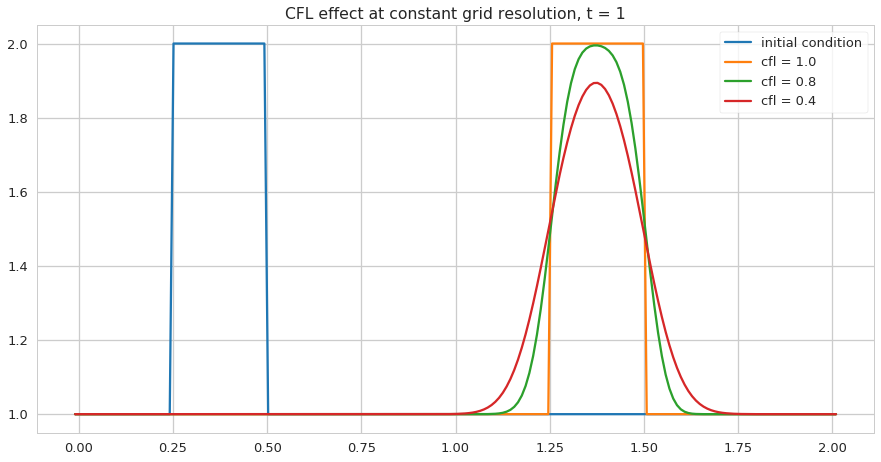

In [5]:
nx    = 200    # Number of points
t_end = 1      # Target time
a     = 1.     # convection speed
l     = 2      # segment length

plt.plot(*initialConditionStep(nx, l))    # Plot initial condition
lgd = ["initial condition"]               # Text saving for the legend

# Run for 3 different CFL numbers
for cfl in [1., 0.8, 0.4]:
    x, u = run(nx, l, a, t_end, cfl, initialConditionStep)
    plt.plot(x, u)
    lgd.append("CFL = {}".format(cfl))     # Legend storing, needed for legend call below
plt.legend(lgd);
plt.title("CFL effect at constant grid resolution, t = {}".format(t_end));

The figure above illustrates nicely the diffusion predicted by equation (\ref{eq:num_visc}): as the CFL number is decreased, the numerical diffusion will increase and smear-out the solution.  The same effect can be illustrated using a sine wave signal.

#### Using a sine wave signal

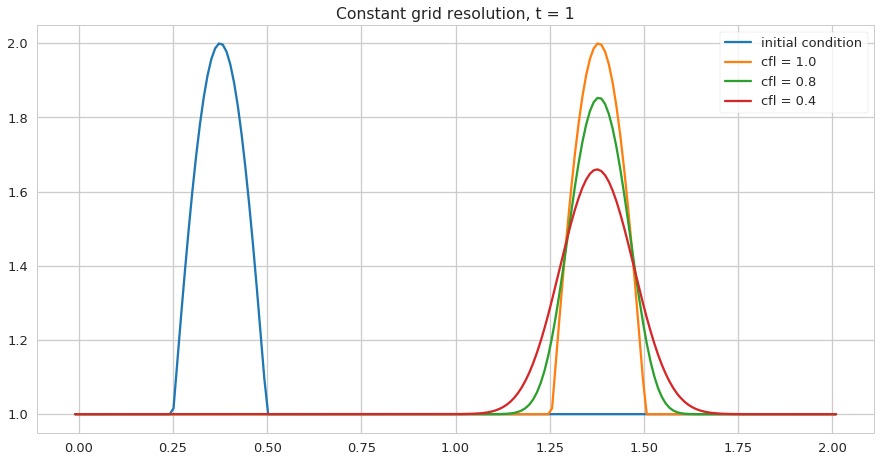

In [6]:
nx    = 200    # Number of points
t_end = 1      # Target time
a     = 1.     # convection speed
l     = 2      # segment length

plt.plot(*initialConditionSine(nx, l))    # Plot initial condition
lgd = ["initial condition"]               # Text saving for the legend

# Run for 3 different CFL numbers
for cfl in [1., 0.8, 0.4]:
    x, u = run(nx, l, a, t_end, cfl, initialConditionSine)
    plt.plot(x, u)
    lgd.append("CFL = {}".format(cfl))     # Legend storing, needed for legend call below
plt.legend(lgd);
plt.title("Constant grid resolution, t = {}".format(t_end));

### Illustration of the Effect of Grid Resolution on the Numerical Solution

We will now illustrate the effect of grid resolution on the diffusion of the numerical solution, using a constant CFL number.

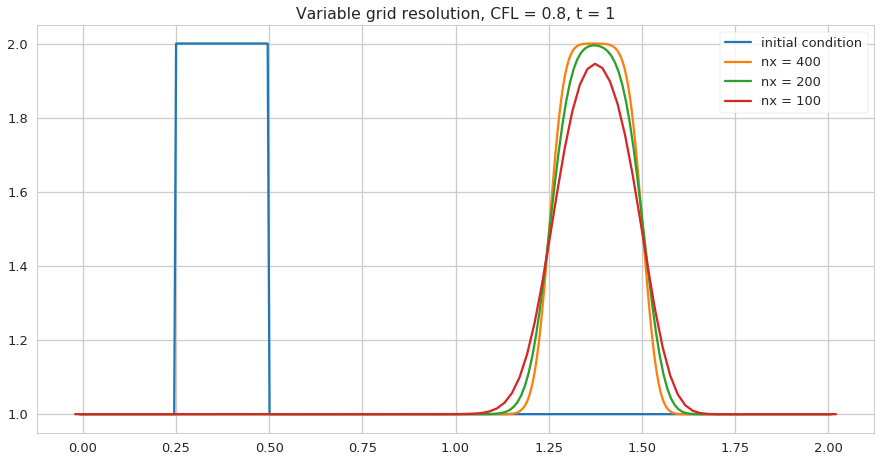

In [15]:
nx    = 400    # Number of points
t_end = 1      # Target time
a     = 1.     # convection speed
l     = 2      # segment length
cfl   = 0.8    # CFL number

plt.plot(*initialConditionStep(nx, l))    # Plot initial condition
lgd = ["initial condition"]               # Text saving for the legend

# Run for 3 different CFL numbers
for nx in [400, 200, 100]:
    x, u = run(nx, l, a, t_end, cfl, initialConditionStep)
    plt.plot(x, u)
    lgd.append("nx = {}".format(nx))     # Legend storing, needed for legend call below
plt.legend(lgd);
plt.title("Variable grid resolution, CFL = {}, t = {}".format(cfl, t_end));

### Illustration of the Effect of CFL > 1 on the Numerical Solution

#### Using the heaviside step initial condition

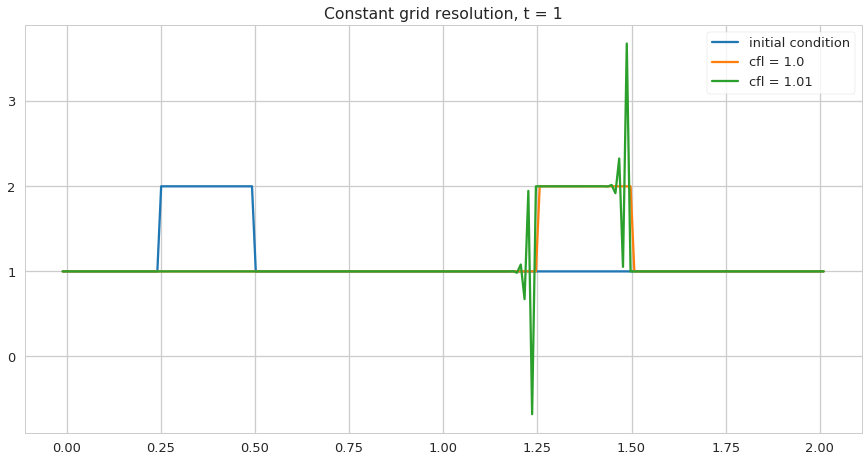

In [11]:
nx    = 200    # Number of points
t_end = 1      # Target time
a     = 1.     # convection speed
l     = 2      # segment length

plt.plot(*initialConditionStep(nx, l))    # Plot initial condition
lgd = ["initial condition"]               # Text saving for the legend

# Run for CFL > 1
for cfl in [1., 1.01]:
    x, u = run(nx, l, a, t_end, cfl, initialConditionStep)
    plt.plot(x, u)
    lgd.append("CFL = {}".format(cfl))     # Legend storing, needed for legend call below
plt.legend(lgd);
plt.title("Constant grid resolution, t = {}".format(t_end));

This illustrates very clearly how the solution blows up for CFL > 1. 

#### Using a half sine wave

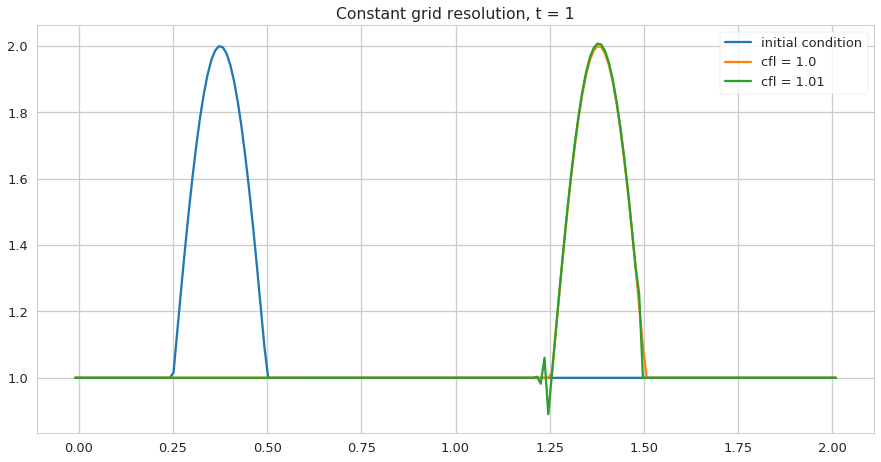

In [14]:
plt.plot(*initialConditionSine(nx, l))    # Plot initial condition
lgd = ["initial condition"]               # Text saving for the legend

# Run for CFL > 1
for cfl in [1., 1.01]:
    x, u = run(nx, l, a, 1, cfl, initialConditionSine)
    plt.plot(x, u)
    lgd.append("CFL = {}".format(cfl))     # Legend storing, needed for legend call below
plt.legend(lgd);
plt.title("Constant grid resolution, t = {}".format(t_end));

As in the previous example, the solution show instabilities introduced by numerical errors. And, although it may seem that the instabilities introduced are less critical than those encountered with the heaviside step-function, they will eventually also lead to a blow-up of the solution.